In [ ]:
!pip install sentence_transformers
!pip install umap-learn

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sentence_transformers import SentenceTransformer

import pandas as pd
import numpy as np

import umap
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [32]:
def dim_red(mat, p, method):
    if method=='ACP':
      pca = PCA(n_components=p)
      mat = pca.fit_transform(mat)
      red_mat = mat[:,:p]

    elif method=='UMAP':
      reducer = umap.UMAP(n_components=p)
      red_mat = reducer.fit_transform(mat)

    elif method=='T-SNE':
        tsne = TSNE(n_components=p, init='pca', perplexity=50, random_state=42, n_jobs=-1) #init peut etre 'random' aussi
        red_mat = tsne.fit_transform(mat)
    else:
        raise Exception("Please select one of the three methods : APC, AFC, UMAP")

    return red_mat


def clus(mat, clus_tech ,k):
  if clus_tech=='kmeans':
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(mat)
    labels=kmeans.labels_
  elif clus_tech=='CAH-ward':
    agglomerative_clustering = AgglomerativeClustering(n_clusters=k)
    labels = agglomerative_clustering.fit_predict(mat)
  elif clus_tech=='CAH-min':
    agglomerative_clustering = AgglomerativeClustering(n_clusters=k,linkage='single')
    labels = agglomerative_clustering.fit_predict(mat)
  elif clus_tech=='CAH-max':
    agglomerative_clustering = AgglomerativeClustering(n_clusters=k,linkage='complete')
    labels = agglomerative_clustering.fit_predict(mat)


  return labels

In [6]:
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

np.save('labels.npy', labels)
labels = np.load('labels.npy')


# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

In [57]:
embeddings=pd.read_csv('embeddings.csv').values

methods = ['ACP','UMAP','T-SNE']
clustering_methods=['kmeans','CAH-ward','CAH-min','CAH-max']

for method in methods:
  if method=='T-SNE':
    red_emb = dim_red(embeddings, 2, method)
  else:
    red_emb = dim_red(embeddings, 20, method)

  for clus_tech in clustering_methods:
      pred = clus(red_emb,clus_tech, k)
      # Evaluate clustering results
      nmi_score = normalized_mutual_info_score(pred, labels)
      ari_score = adjusted_rand_score(pred, labels)

      # Print results
      print(f'Method: {method}, Clustering Method: {clus_tech} \nNMI: {nmi_score:.2f} \nARI: {ari_score:.2f}\n')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Method: ACP, Clustering Method: kmeans 
NMI: 0.41 
ARI: 0.23

Method: ACP, Clustering Method: CAH-ward 
NMI: 0.40 
ARI: 0.20

Method: ACP, Clustering Method: CAH-min 
NMI: 0.02 
ARI: 0.00

Method: ACP, Clustering Method: CAH-max 
NMI: 0.34 
ARI: 0.13



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Method: UMAP, Clustering Method: kmeans 
NMI: 0.47 
ARI: 0.29

Method: UMAP, Clustering Method: CAH-ward 
NMI: 0.46 
ARI: 0.27

Method: UMAP, Clustering Method: CAH-min 
NMI: 0.04 
ARI: 0.00

Method: UMAP, Clustering Method: CAH-max 
NMI: 0.46 
ARI: 0.27



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Method: T-SNE, Clustering Method: kmeans 
NMI: 0.40 
ARI: 0.22

Method: T-SNE, Clustering Method: CAH-ward 
NMI: 0.40 
ARI: 0.21

Method: T-SNE, Clustering Method: CAH-min 
NMI: 0.05 
ARI: 0.00

Method: T-SNE, Clustering Method: CAH-max 
NMI: 0.42 
ARI: 0.21



# supplementaire

In [45]:
# choix de nb de composante:

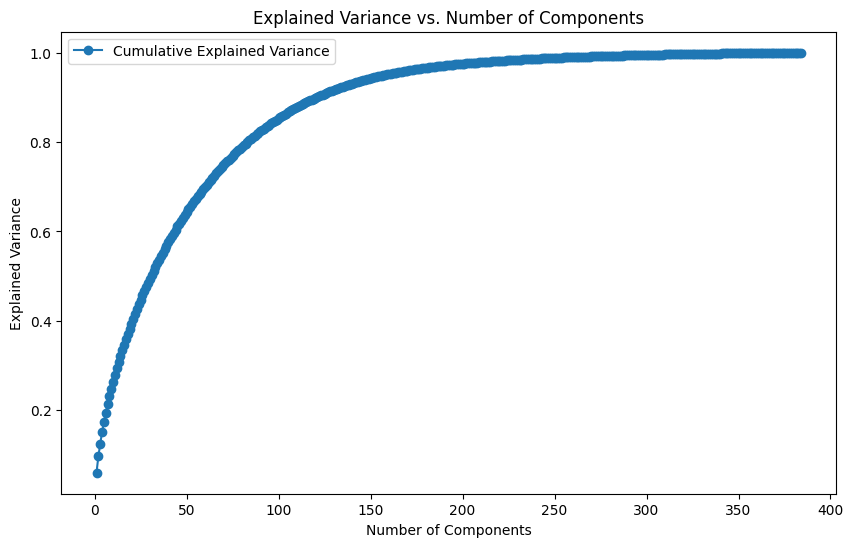

In [17]:
pca = PCA()
pca.fit(embeddings)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         marker='o', linestyle='-', label='Cumulative Explained Variance')

plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.show()

With 100 components, we can represent 85% of the total variance in the data. Therefore, it is better to implement PCA with 100 components rather than 20 (39%).

In [10]:
methods = ['ACP']
for method in methods:
    # Perform dimensionality reduction
    red_emb = dim_red(embeddings, 100, method)

    # Perform clustering
    pred = clus(red_emb,'kmeans', k)

    # Evaluate clustering results
    nmi_score = normalized_mutual_info_score(pred, labels)
    ari_score = adjusted_rand_score(pred, labels)

    # Print results
    print(f'Method: {method}\nNMI: {nmi_score:.2f} \nARI: {ari_score:.2f}\n')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Method: ACP
NMI: 0.41 
ARI: 0.21



slightly better results

In [14]:
def scatterplot_express2D(df, x, y, color_column=None):
   if color_column is not None:
       fig = px.scatter(df, x=x, y=y, color=color_column, labels={'color': 'class'}, width=620, height=500, render_mode='svg')
   else:
       fig = px.scatter(df, x=x, y=y, width=620, height=500, render_mode='svg')
   fig.show()

In [12]:
def scatterplot_express3D(df, x, y, z, color_column=None):
   if color_column is not None:
       fig = px.scatter_3d(df, x=x, y=y, z=z, color=color_column, labels={'color': 'class'}, width=650, height=500)

   fig.update_traces(marker_size=8)
   fig.show()


In [23]:
def scatterplot_seaborn2D(df, x, y, color_column=None):
    plt.figure(figsize=(8, 6))

    if color_column is not None:
        sns.scatterplot(data=df, x=x, y=y, hue=color_column)
    else:
        sns.scatterplot(data=df, x=x, y=y)

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Method: ACP
NMI: 0.41 
ARI: 0.22



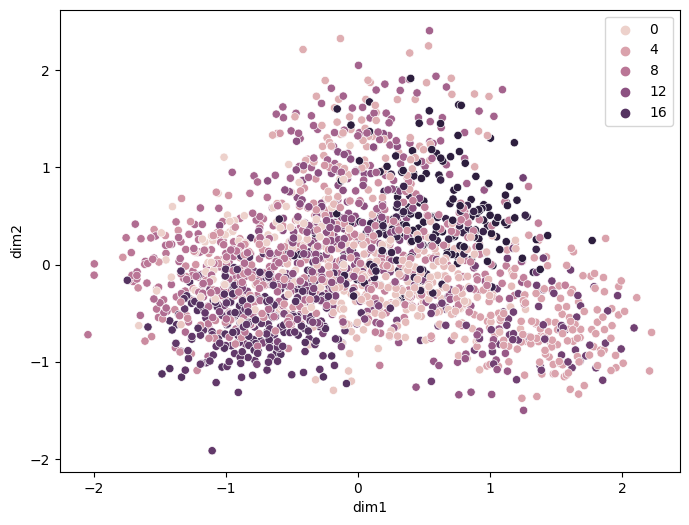

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Method: UMAP
NMI: 0.48 
ARI: 0.29



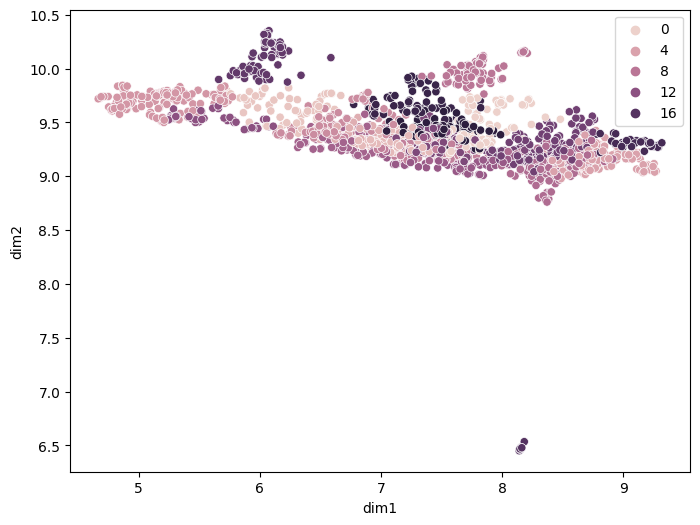

In [25]:
embeddings=pd.read_csv('embeddings.csv')

methods = ['ACP','UMAP']

for method in methods:
    # Perform dimensionality reduction
    red_emb = dim_red(embeddings, 20, method)

    # Perform clustering
    pred = clus(red_emb,'kmeans', k)

    # Evaluate clustering results
    nmi_score = normalized_mutual_info_score(pred, labels)
    ari_score = adjusted_rand_score(pred, labels)

    # Print results
    print(f'Method: {method}\nNMI: {nmi_score:.2f} \nARI: {ari_score:.2f}\n')

    pca_columns = ['dim' + str(c) for c in range(1, red_emb.shape[1]+1, 1)]
    X_pca = pd.DataFrame(red_emb, columns=pca_columns) #red_emb
    scatterplot_seaborn2D(X_pca, 'dim1', 'dim2', pred)
    scatterplot_express3D(X_pca, 'dim1', 'dim2','dim3', pred)

Method: ACP
NMI: 0.02 
ARI: 0.00



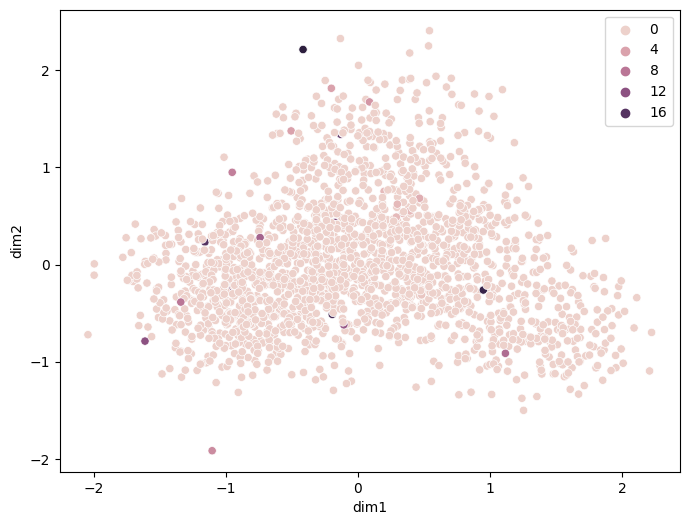

Method: UMAP
NMI: 0.05 
ARI: 0.00



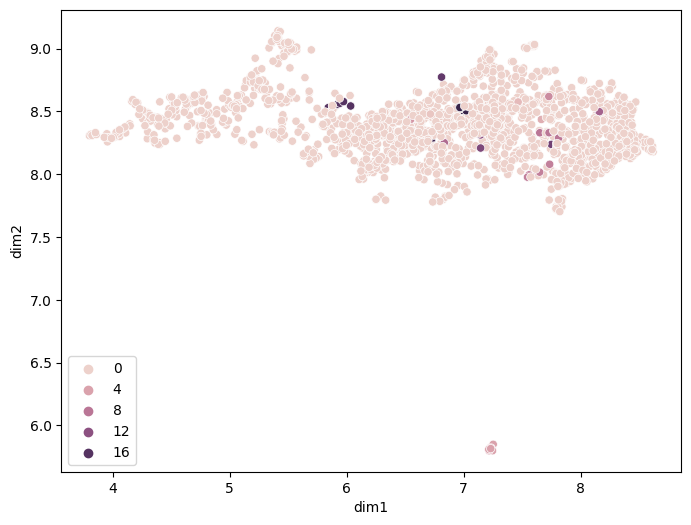

In [27]:
methods = ['ACP','UMAP']

for method in methods:
    # Perform dimensionality reduction
    red_emb = dim_red(embeddings, 20, method)

    # Perform clustering
    pred = clus(red_emb,'CAH-min', k)

    # Evaluate clustering results
    nmi_score = normalized_mutual_info_score(pred, labels)
    ari_score = adjusted_rand_score(pred, labels)

    # Print results
    print(f'Method: {method}\nNMI: {nmi_score:.2f} \nARI: {ari_score:.2f}\n')

    pca_columns = ['dim' + str(c) for c in range(1, red_emb.shape[1]+1, 1)]
    X_pca = pd.DataFrame(red_emb, columns=pca_columns) #red_emb
    scatterplot_seaborn2D(X_pca, 'dim1', 'dim2', pred)

It's evident that the application of the agglomerative clustering algorithm with single linkage is yielding suboptimal results, likely due to the chain effect inherent in this linkage method. To enhance the quality of our clustering analysis, several strategies can be employed. First, experimenting with alternative linkage methods, such as 'complete' or 'average,' may reveal more suitable structures within the data. The choice of linkage method can significantly impact the clustering outcome, and it's worthwhile to explore different options. Additionally, adjusting the number of clusters (k) is crucial. Trying various values for k and assessing the resulting clusters using metrics like silhouette score can help identify the optimal number of clusters for our specific dataset. Furthermore, ensuring proper data scaling is essential, especially if the features exhibit different scales. Applying standard scaling techniques before clustering can mitigate sensitivity to varying feature scales. Lastly, gaining a deeper understanding of the data's characteristics through visualization, such as scatter plots, can provide valuable insights into its inherent structure and guide the selection of appropriate clustering parameters.

In [33]:
nmi_scores = []
ari_scores = []




for _ in range(10):


   pred = clus(red_emb,'kmeans', k)


   nmi_score = normalized_mutual_info_score(pred, labels)
   ari_score = adjusted_rand_score(pred, labels)


   nmi_scores.append(nmi_score)
   ari_scores.append(ari_score)


# Calculate mean and standard deviation
mean_nmi = np.mean(nmi_scores)
std_nmi = np.std(nmi_scores)


mean_ari = np.mean(ari_scores)
std_ari = np.std(ari_scores)


# Print the results
print(f'NMI: {mean_nmi:.2f} ± {std_nmi:.2f}')
print(f'ARI: {mean_ari:.2f} ± {std_ari:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

NMI: 0.47 ± 0.01
ARI: 0.28 ± 0.01


In [34]:
nmi_scores

[0.4658125234458054,
 0.46485616526804985,
 0.4598737184768238,
 0.47557997812205616,
 0.4638898533643695,
 0.4798243165963947,
 0.4786008053796972,
 0.47364109132841714,
 0.4639329631735263,
 0.4662533049129055]

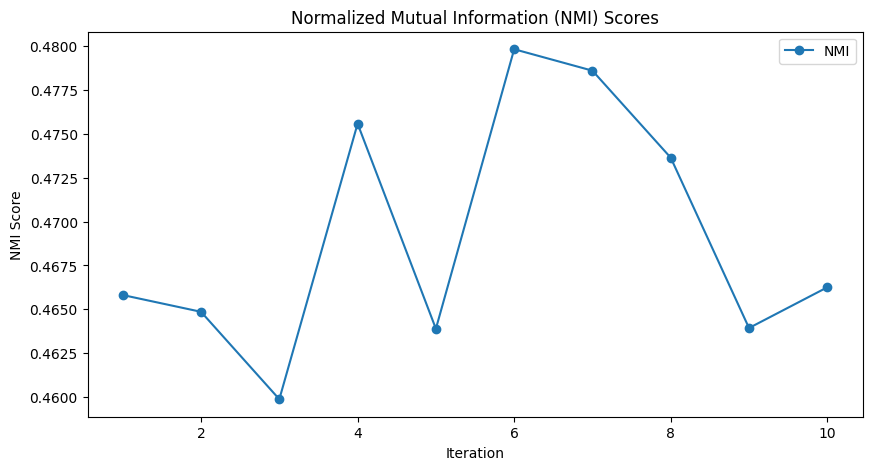

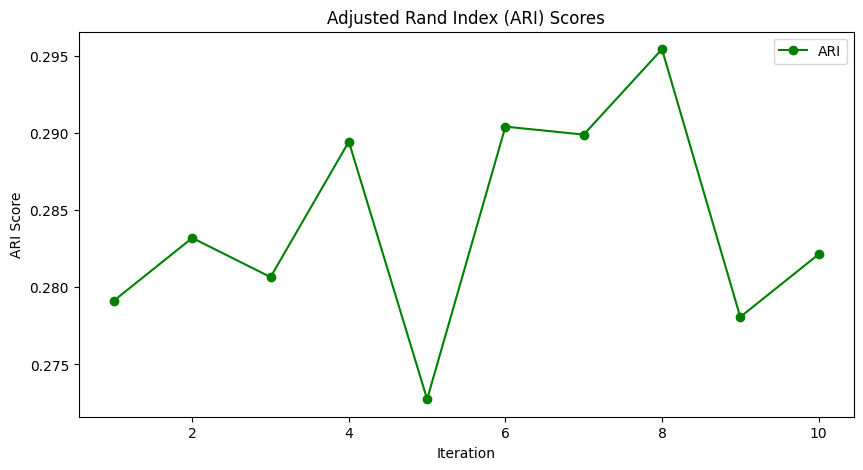

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), nmi_scores, marker='o', label='NMI')
plt.title('Normalized Mutual Information (NMI) Scores')
plt.xlabel('Iteration')
plt.ylabel('NMI Score')
plt.legend()
plt.show()

# Plot the ARI scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), ari_scores, marker='o', label='ARI', color='green')
plt.title('Adjusted Rand Index (ARI) Scores')
plt.xlabel('Iteration')
plt.ylabel('ARI Score')
plt.legend()
plt.show()

In [39]:
type(embeddings)

numpy.ndarray

In [46]:
pd.DataFrame(embeddings).to_csv('embeddings.csv', index=False)

In [48]:
embeddings=pd.read_csv('embeddings.csv').values
embeddings

array([[-0.57739985, -0.03035756, -0.10226087, ..., -0.3756016 ,
        -0.09159012, -0.05665846],
       [-0.5476496 , -0.14716172, -0.10938037, ..., -0.18822178,
        -0.07229099, -0.15016392],
       [ 0.00645863,  0.16189742, -0.22414456, ..., -0.38403463,
         0.30487227,  0.17581569],
       ...,
       [-0.23235752,  0.0172757 , -0.21409522, ..., -0.24929896,
        -0.13749774,  0.03162356],
       [-0.35668224,  0.0924803 , -0.26561555, ..., -0.08004158,
        -0.31399345,  0.0114702 ],
       [-0.39642936, -0.14386117, -0.07510001, ..., -0.00914432,
        -0.09982083, -0.12229348]])